In [9]:
import keras
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation,Input, Merge, add
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import random

In [10]:
data = pd.read_csv('../Data/trainset_1120.csv')
x = data.drop(data.columns[[0, 1]], axis=1)
x = np.array(x)
y = data['target']
y = np.array(y)

In [11]:
random.seed(867)
train_index = np.random.choice(range(data.shape[0]),int(0.8*data.shape[0]))
validate_index=set(range(data.shape[0]))-set(train_index)
validate_index=np.array(list(validate_index),dtype='int64')

In [12]:
x_train = x[train_index,:]
x_validate = x[validate_index,:]
y_train = y[train_index]
y_validate = y[validate_index]

In [13]:
import keras.backend as K
import tensorflow as tf
def gini(actual, pred):
    pred = tf.argmax(pred, axis=1)
    actual = tf.argmax(actual, axis=1)
    nT = K.shape(pred)[0]
    n = K.cast(nT, dtype='int32')
    n_float = K.cast(nT, dtype=K.floatx())
    actual = K.reshape(actual,(1,n))[-1]
    pred = K.reshape(pred,(1,n))[-1]
    inds = tf.nn.top_k(pred, n)[1]
    a_s = K.gather(actual, inds)
    a_c = K.cumsum(a_s)
    s1 = K.sum(a_c)
    s2 = K.sum(a_s)
    giniSum = K.cast(tf.divide(s1,s2),dtype=K.floatx()) - K.cast(tf.divide(n+1,2),dtype=K.floatx())
    standard_gini = K.cast(tf.divide(giniSum,n_float),dtype=K.floatx())
    return standard_gini

def gini_normalized(a, p):
    norm_gini = K.cast(tf.divide(gini(a, p),gini(a, a)),dtype=K.floatx())
    return norm_gini


In [14]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight

array([  0.51899207,  13.66338594])

In [15]:

model = Sequential()
model.add(Dense(400, activation='relu', input_dim=new_x_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy", optimizer=sgd, 
              metrics=['accuracy',gini_normalized])#class_weight={0:class_weight[0],1:class_weight[1]}
model.fit(new_x_train, new_y_train, epochs=10, batch_size=1000)

NameError: name 'new_x_train' is not defined

In [17]:
# Convert to one-hot-vector
nb_classes = 2
OH_y_train = np.eye(nb_classes)[y_train]
OH_y_validate = np.eye(nb_classes)[y_validate]

##
model = Sequential()
model.add(Dense(203, input_dim=np.shape(x_train)[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

nn_interaction = model.fit(x_train, OH_y_train,epochs=100,batch_size=5000 ,class_weight = {0:0.51901583 , 1:13.64693913},
          validation_data=(x_validate, OH_y_validate))

Train on 476169 samples, validate on 267438 samples
Epoch 1/100
295000/476169 [=================>............] - ETA: 3s - loss: 3.6013 - acc: 0.5122 - gini_normalized: 0.0248

KeyboardInterrupt: 

In [59]:
# Convert to one-hot-vector
nb_classes = 2
OH_y_train = np.eye(nb_classes)[y_train]
OH_y_validate = np.eye(nb_classes)[y_validate]

##
model = Sequential()
model.add(Dense(80, input_dim=np.shape(x_train)[1], activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(20, input_dim=np.shape(x_train)[1], activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, input_dim=np.shape(x_train)[1], activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, input_dim=np.shape(x_train)[1], activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

nn_interaction = model.fit(x_train, OH_y_train,epochs=35,batch_size=5000 ,class_weight = {0:0.51901583 , 1:13.64693913},
          validation_data=(x_validate, OH_y_validate))

Train on 476169 samples, validate on 267438 samples
Epoch 1/35
476169/476169 [==============================] - 31s 65us/step - loss: 0.9751 - acc: 0.6327 - gini_normalized: 0.0051 - val_loss: 0.7179 - val_acc: 0.0872 - val_gini_normalized: -6.6587e-04
Epoch 2/35
476169/476169 [==============================] - 19s 39us/step - loss: 0.6964 - acc: 0.3485 - gini_normalized: -0.0047 - val_loss: 0.7058 - val_acc: 0.1041 - val_gini_normalized: 0.0077
Epoch 3/35
476169/476169 [==============================] - 11s 24us/step - loss: 0.6936 - acc: 0.4023 - gini_normalized: 0.0064 - val_loss: 0.7247 - val_acc: 0.0365 - val_gini_normalized: 0.0035
Epoch 4/35
476169/476169 [==============================] - 11s 23us/step - loss: 0.6935 - acc: 0.4016 - gini_normalized: 0.0130 - val_loss: 0.6855 - val_acc: 0.7104 - val_gini_normalized: 0.0231
Epoch 5/35
476169/476169 [==============================] - 12s 25us/step - loss: 0.6935 - acc: 0.3853 - gini_normalized: 0.0039 - val_loss: 0.6928 - val_acc:

In [60]:



# No interaction (raw) data
raw_x_train = x_train[:,0:x_train.shape[1]-91]
raw_x_validate = x_validate[:,0:x_validate.shape[1]-91]
##
model = Sequential()
model.add(Dense(80, input_dim=np.shape(raw_x_train)[1], activation='sigmoid'))
model.add(Dropout(0.35))
model.add(Dense(20, input_dim=np.shape(raw_x_train)[1], activation='sigmoid'))
model.add(Dropout(0.15))
model.add(Dense(10, input_dim=np.shape(raw_x_train)[1], activation='sigmoid'))
model.add(Dropout(0.15))
model.add(Dense(2, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

nn_raw = model.fit(raw_x_train, OH_y_train,epochs=35,batch_size=5000 ,class_weight = {0:0.51901583 , 1:13.64693913},
          validation_data=(raw_x_validate, OH_y_validate))

Train on 476169 samples, validate on 267438 samples
Epoch 1/35
476169/476169 [==============================] - 11s 22us/step - loss: 0.7022 - acc: 0.4217 - gini_normalized: 0.0439 - val_loss: 0.6842 - val_acc: 0.6464 - val_gini_normalized: 0.1530
Epoch 2/35
476169/476169 [==============================] - 9s 19us/step - loss: 0.6828 - acc: 0.5837 - gini_normalized: 0.1155 - val_loss: 0.6504 - val_acc: 0.7079 - val_gini_normalized: 0.1533
Epoch 3/35
476169/476169 [==============================] - 10s 20us/step - loss: 0.6773 - acc: 0.6163 - gini_normalized: 0.1403 - val_loss: 0.6733 - val_acc: 0.6364 - val_gini_normalized: 0.1654
Epoch 4/35
476169/476169 [==============================] - 9s 20us/step - loss: 0.6744 - acc: 0.6159 - gini_normalized: 0.1578 - val_loss: 0.6382 - val_acc: 0.6823 - val_gini_normalized: 0.1652
Epoch 5/35
476169/476169 [==============================] - 9s 19us/step - loss: 0.6723 - acc: 0.6137 - gini_normalized: 0.1616 - val_loss: 0.6366 - val_acc: 0.6745 -

In [103]:
cols_use = [c for c in data.columns if (not c.startswith(('ps_calc_','d','id','target')))] 
# No clean (no noise) data
clean_x = data[cols_use]
clean_x = np.array(clean_x)
clean_x_clean_xtrain = clean_x[train_index,:]
clean_x_validate = clean_x[validate_index,:]
model = Sequential()
model.add(Dense(80, input_dim=np.shape(clean_x_train)[1], activation='sigmoid'))
model.add(Dropout(0.35))
model.add(Dense(20, input_dim=np.shape(clean_x_train)[1], activation='sigmoid'))
model.add(Dropout(0.15))
model.add(Dense(10, input_dim=np.shape(clean_x_train)[1], activation='sigmoid'))
model.add(Dropout(0.15))
model.add(Dense(2, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',gini_normalized])

nn_clean = model.fit(clean_x_train, OH_y_train,epochs=35,batch_size=5000 ,class_weight = {0:0.51901583 , 1:13.64693913},
          validation_data=(clean_x_validate, OH_y_validate))

Train on 476169 samples, validate on 267438 samples
Epoch 1/35
476169/476169 [==============================] - 13s 27us/step - loss: 0.6981 - acc: 0.5357 - gini_normalized: 0.0464 - val_loss: 0.6851 - val_acc: 0.5764 - val_gini_normalized: 0.1581
Epoch 2/35
476169/476169 [==============================] - 7s 16us/step - loss: 0.6828 - acc: 0.5570 - gini_normalized: 0.1154 - val_loss: 0.7315 - val_acc: 0.4608 - val_gini_normalized: 0.1586
Epoch 3/35
476169/476169 [==============================] - 8s 17us/step - loss: 0.6764 - acc: 0.5612 - gini_normalized: 0.1496 - val_loss: 0.6345 - val_acc: 0.6523 - val_gini_normalized: 0.1659
Epoch 4/35
476169/476169 [==============================] - 7s 15us/step - loss: 0.6741 - acc: 0.5716 - gini_normalized: 0.1605 - val_loss: 0.6911 - val_acc: 0.5458 - val_gini_normalized: 0.1708
Epoch 5/35
476169/476169 [==============================] - 7s 16us/step - loss: 0.6723 - acc: 0.5712 - gini_normalized: 0.1683 - val_loss: 0.6816 - val_acc: 0.5612 - 

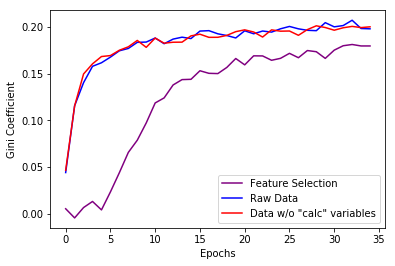

In [110]:
plt.plot(nn_interaction.history['gini_normalized'],label='Feature Selection',color='purple')
plt.plot(nn_raw.history['gini_normalized'],label='Raw Data',color='blue')
plt.plot(nn_clean.history['gini_normalized'],label='Data w/o "calc" variables',color='red')
plt.legend(loc=4)
plt.xlabel('Epochs')
plt.ylabel('Gini Coefficient')
plt.show()


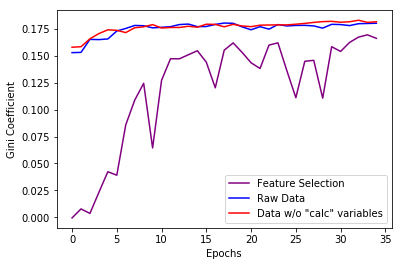

In [111]:
plt.plot(nn_interaction.history['val_gini_normalized'],label='Feature Selection',color='purple')
plt.plot(nn_raw.history['val_gini_normalized'],label='Raw Data',color='blue')
plt.plot(nn_clean.history['val_gini_normalized'],label='Data w/o "calc" variables',color='red')
plt.xlabel('Epochs')
plt.ylabel('Gini Coefficient')
plt.legend(loc=4)
plt.show()


In [119]:
nn_interaction.history['gini_normalized'][len(nn_clean.history['val_gini_normalized'])-1]

0.17962798858213813

In [118]:
nn_raw.history['gini_normalized'][len(nn_raw.history['val_gini_normalized'])-1]

0.19799307123730311

In [120]:
1796/1979-1

-0.09247094492167762